In [1]:
import torch, os, pickle, time, scipy
import torch_geometric as tg
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os.path as osp
import networkx as nx
path='~/../../tigress/cj1223/merger_trees/isotrees/'
transform_path='~/../../scratch/gpfs/cj1223/GraphStorage/transformer'
all_cols=np.array([0,2,4,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,35]+list(range(37,60)))
targets=[8,11,15,23]

In [2]:
a=np.array([0, 1,2,3,4,5])
a=np.arange(43)
a=np.delete(a, [])
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [3]:
str([1])

'[1]'

## load column names

In [4]:
### targets
ex=f'../samout/{0}_{0}_{0}/galprop_0-99.dat'
pdc=pd.read_table(path+ex, skiprows=0, delimiter=',', nrows=41, header=None)

colst=pdc.iloc[targets,0]
cols_t = []
for i, col in enumerate(colst):
    cols_t.append(col[4:]+f'({i})') 

In [5]:
halos=pd.read_table(path+f'isotree_0_0_0.dat', skiprows=0, nrows=1, delimiter='\s+')
cols_h = []
for i, col in enumerate(halos.columns[all_cols]):
    if col[-1] == ')':
        cols_h.append(col[:-3]+f'({i})')
    else:
        cols_h.append(col+f'({i})')        

In [6]:
cols_h

['#scale(0)',
 'desc_scale(1)',
 'num_prog(2)',
 'Mvir((3)',
 'Rvir((4)',
 'rs((5)',
 'vrms((6)',
 'mmp?((7)',
 'scale_of_last_MM((8)',
 'vmax((9)',
 'x((10)',
 'y((11)',
 'z((12)',
 'vx((13)',
 'vy((14)',
 'vz((15)',
 'Jx((16)',
 'Jy((17)',
 'Jz((18)',
 'Tidal_Force((19)',
 'Rs_Klypin(20)',
 'Mvir_all(21)',
 'M200b(22)',
 'M200c(23)',
 'M500c(24)',
 'M2500c(25)',
 'Xoff(26)',
 'Voff(27)',
 'Spin_Bullock(28)',
 'b_to_a(29)',
 'c_to_a(30)',
 'A[x](31)',
 'A[y](32)',
 'A[z](33)',
 'b_to_a(50(34)',
 'c_to_a(50(35)',
 'A[x](50(36)',
 'A[y](50(37)',
 'A[z](50(38)',
 'T/|U|(39)',
 'M_pe_Behroozi(40)',
 'M_pe_Diemer(41)',
 'Halfmass_Radius(42)']

In [6]:
feat=['quantile', 'standard', 'power']

targ=['quant', 'stand']

In [7]:
case="vlarge_all_4t_z0.0_quantile_raw"
transform=feat[0]
t=targ[0]

# case=case+f'_{transform}'+f'_{t}'

datat=pickle.load(open(osp.expanduser(\
                f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl'), 'rb'))

In [ ]:
# os.listdir(osp.expanduser('~/../../../scratch/gpfs/cj1223/GraphStorage/'))

In [9]:
xs=[]
ys=[]
ls=[]
xf=[]
edge_index=[]
edge_attr=[]
for d in datat: #[:1000]
    xs.append(d.x.numpy())
    xf.append(d.x.numpy()[0])
    ys.append(d.y.numpy())
    edge_index.append(d.edge_index)
    edge_attr.append(d.edge_attr)
    l=len(d.x.numpy())
    ls.append(l)
xs=np.vstack(xs)
xf=np.vstack(xf)
ys=np.vstack(ys)
ls=np.array(ls)
split=np.cumsum(ls)

100%|██████████████████████████████████████████████████████████████| 43/43 [00:00<00:00, 240.84it/s]


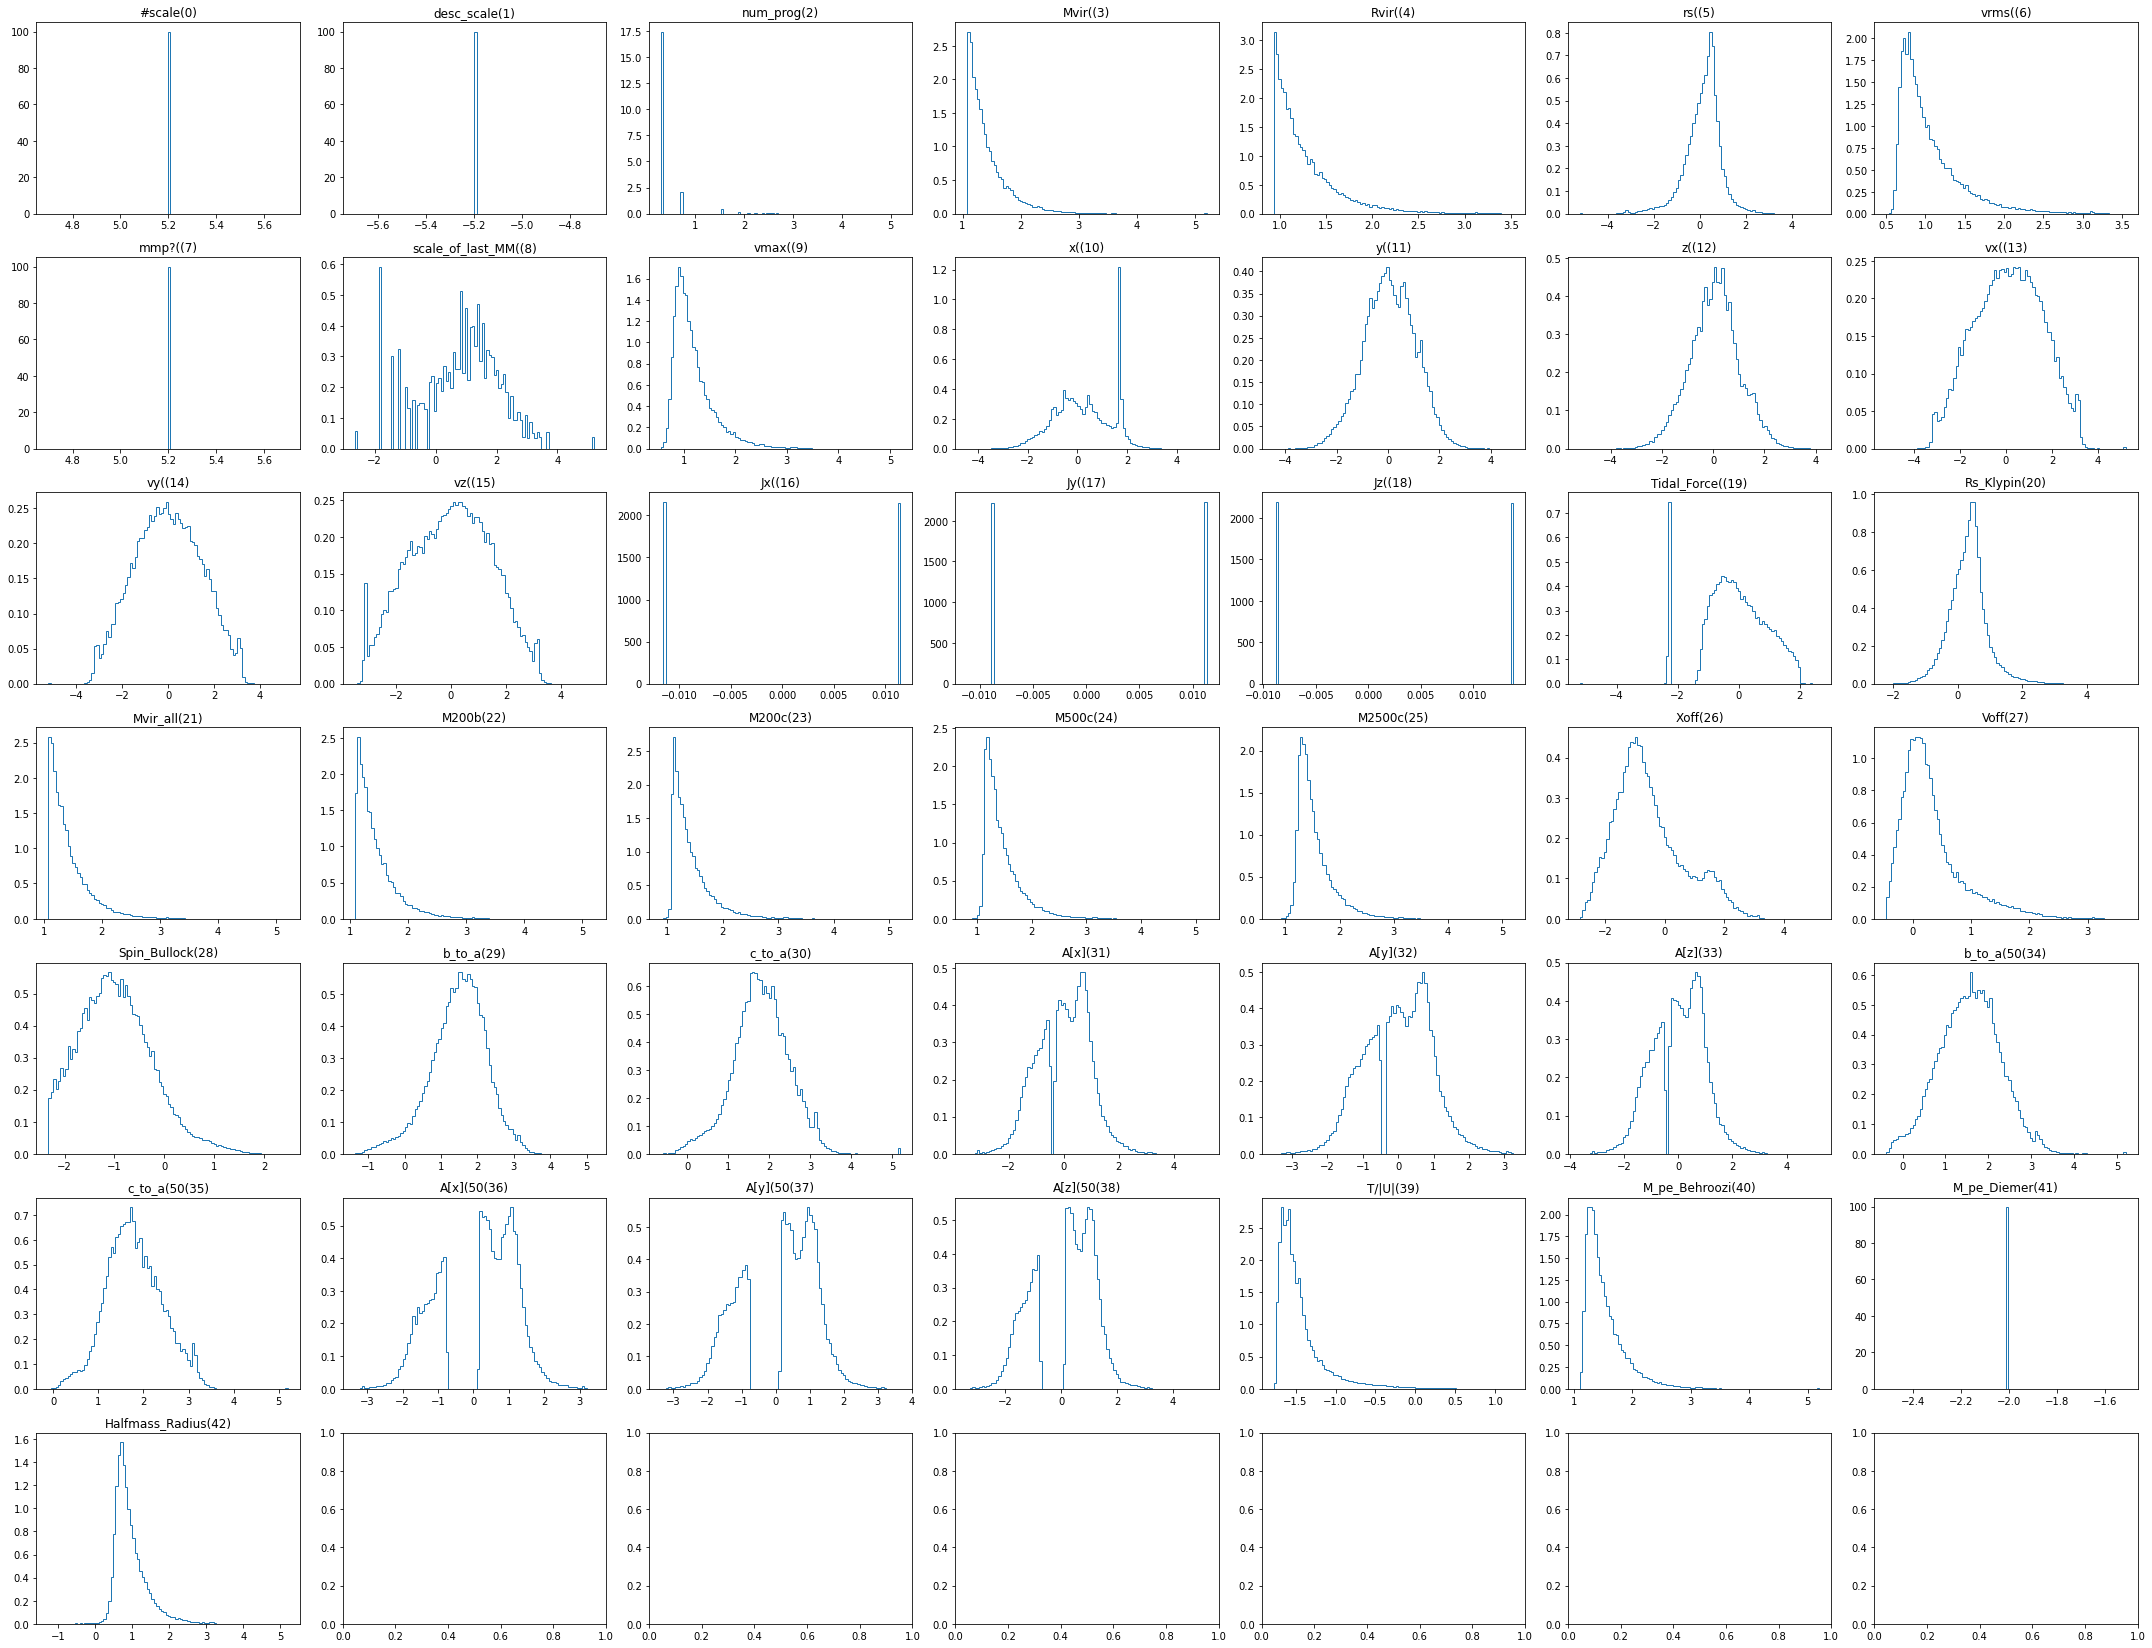

In [10]:
##raw plot

fig,ax=plt.subplots(nrows=7,ncols=7, figsize=(30,23))
ax=ax.flatten()

for i in tqdm(range(len(cols_h))):
    ax[i].hist(xf[:,i], bins=100, density=1, histtype='step');
    ax[i].set(title=cols_h[i])

fig.tight_layout()

100%|████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 261.28it/s]


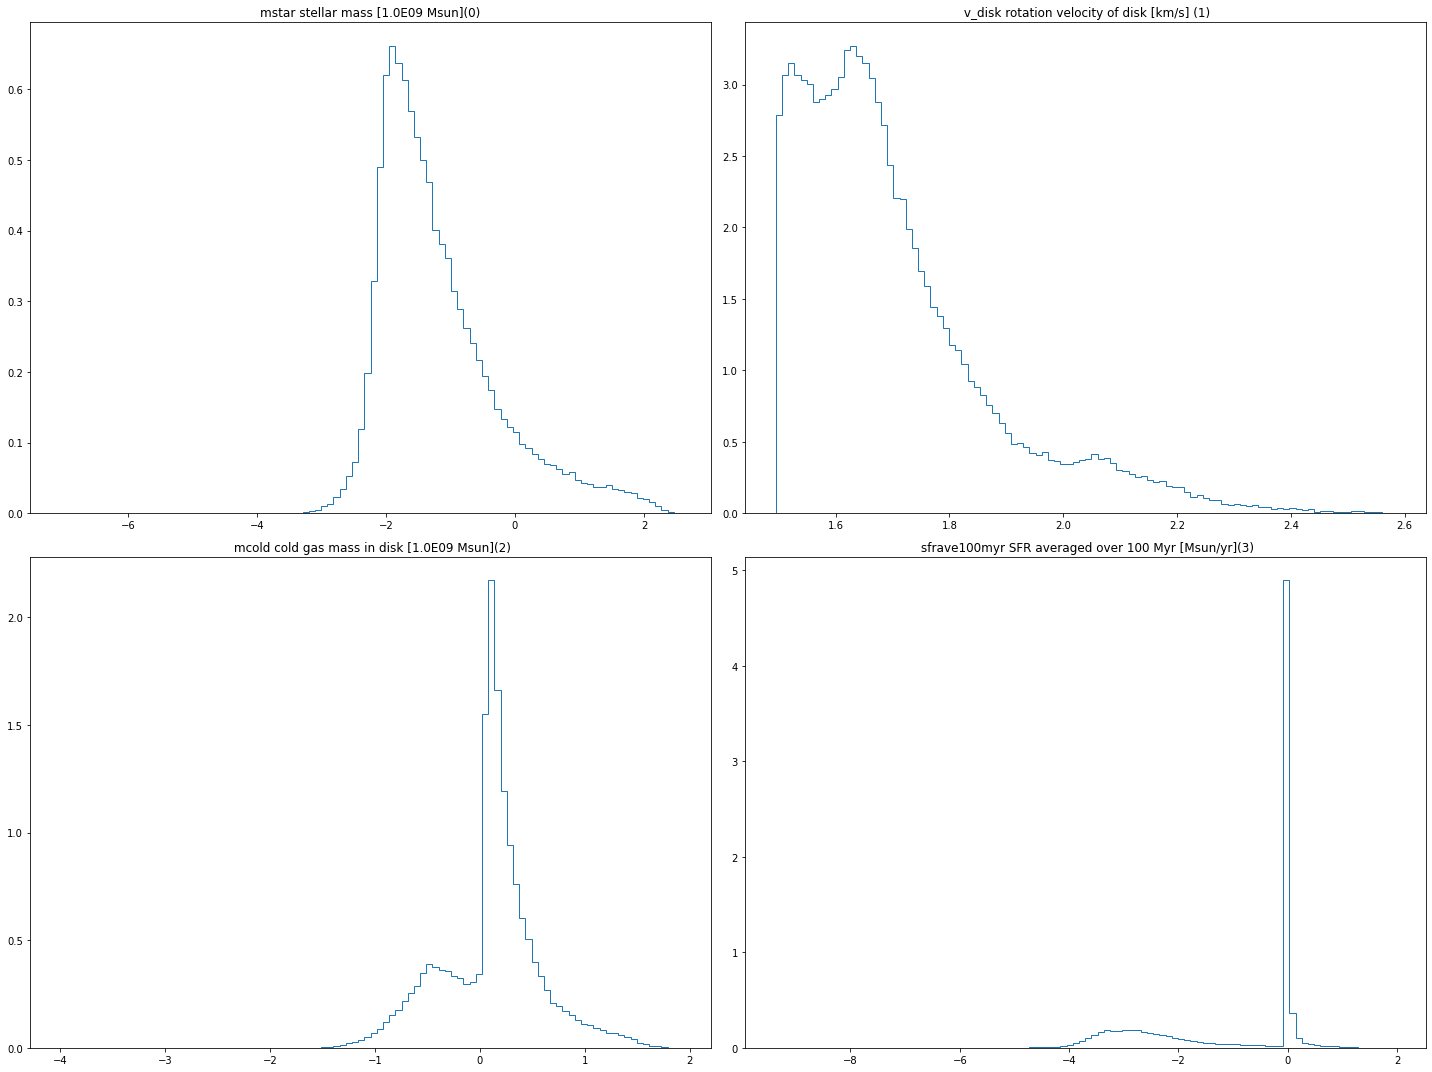

In [11]:
##raw plot

fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(20,15))
ax=ax.flatten()

for i in tqdm(range(len(cols_t))):
    ax[i].hist(ys[:,i], bins=100, density=1, histtype='step');
    ax[i].set(title=cols_t[i])

fig.tight_layout()

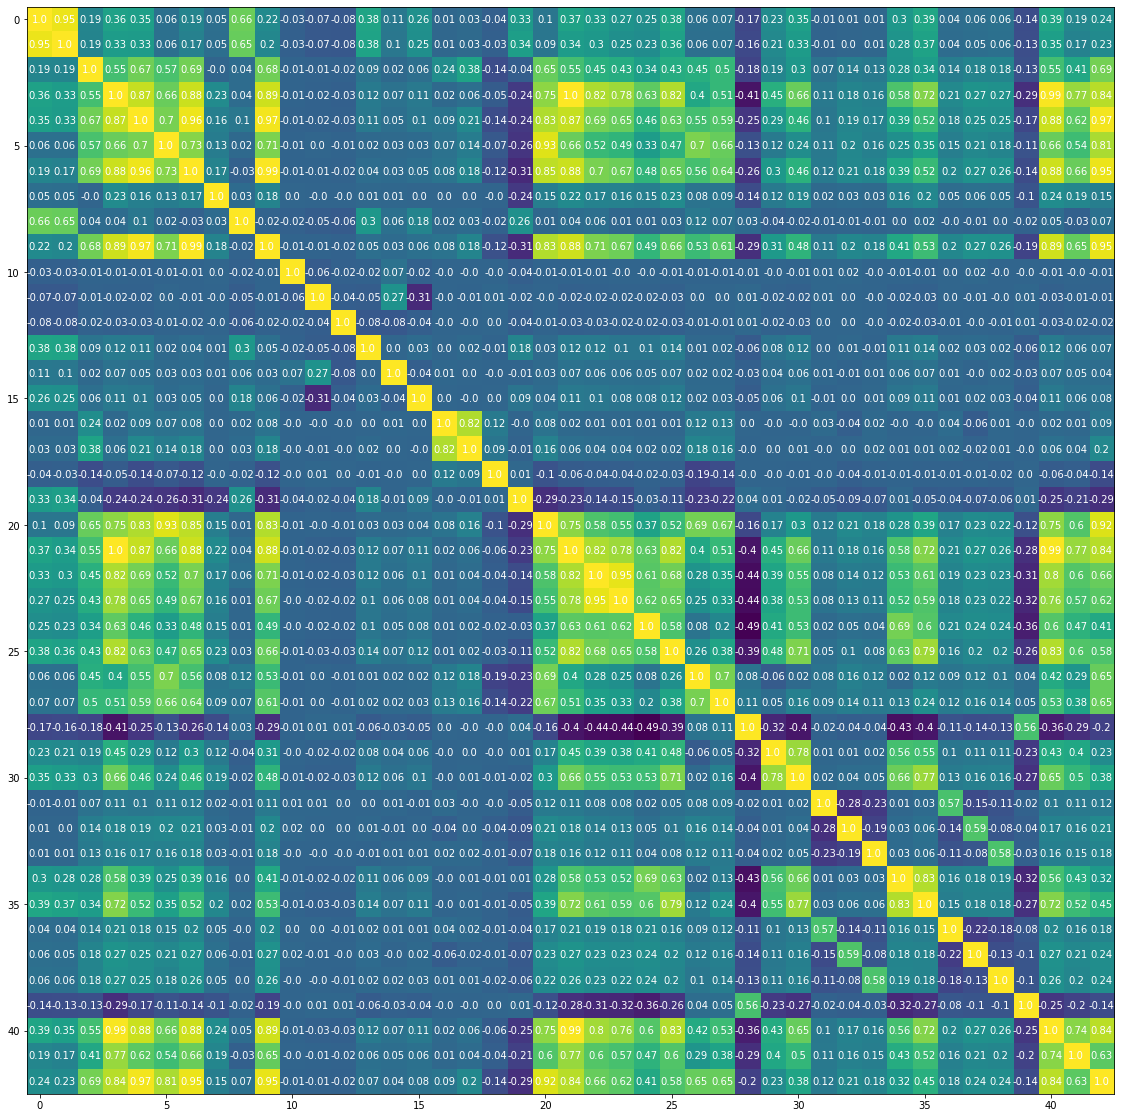

In [20]:
fig, ax = plt.subplots(figsize=(20,20))
corr=np.corrcoef(xs.T)
show = ax.imshow(corr)

for i in range(len(cols_h)):
    for j in range(len(cols_h)):
        text = ax.text(j, i, np.round(corr[i, j], 2),
                       ha="center", va="center", color="w")

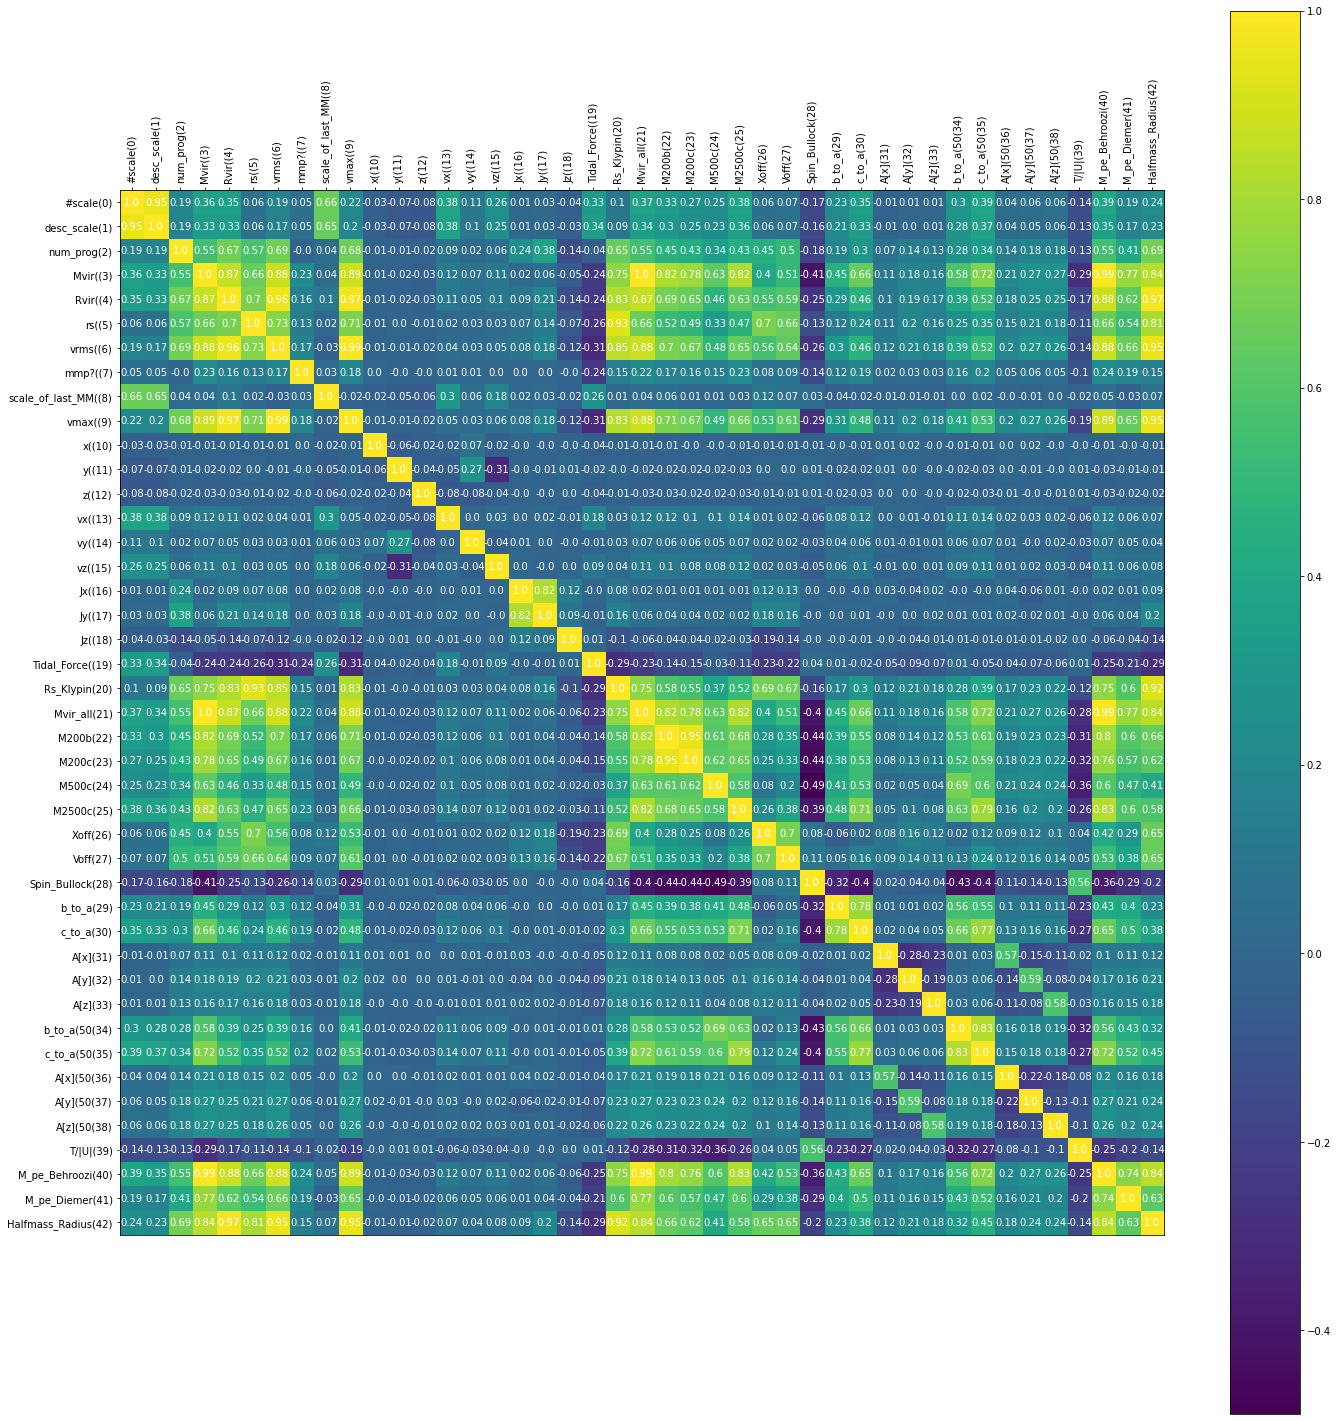

In [21]:
ax.set_xticks(np.arange(len(cols_h)))
ax.set_xticklabels(cols_h, rotation = 90)
ax.set_yticks(np.arange(len(cols_h)))
ax.set_yticklabels(cols_h)
ax.tick_params(axis = 'x', bottom = False, top = True, labelbottom = False, labeltop = True)
# ax.xticks(rotation = 90)

fig.colorbar(show)

fig.tight_layout()
fig

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
corr=np.corrcoef(ys.T)
show = ax.imshow(corr)

for i in range(len(cols_t)):
    for j in range(len(cols_t)):
        text = ax.text(j, i, np.round(corr[i, j], 2),
                       ha="center", va="center", color="w")

/home/cj1223/.conda/envs/juptorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/cj1223/.conda/envs/juptorch/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [ ]:
ax.set_xticks(np.arange(len(cols_t)))
ax.set_xticklabels(cols_t, rotation = 90)
ax.set_yticks(np.arange(len(cols_t)))
ax.set_yticklabels(cols_t)
ax.tick_params(axis = 'x', bottom = False, top = True, labelbottom = False, labeltop = True)
# ax.xticks(rotation = 90)

fig.colorbar(show)

fig.tight_layout()
fig

In [100]:
sel=np.array([ 2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])
targ_feat=np.hstack([ys, xf[:,sel]])
cols=np.array(list(cols_t)+list(np.array(cols_h)[sel]))
cols

array(['mstar stellar mass [1.0E09 Msun](0)',
       ' v_disk rotation velocity of disk [km/s] (1)',
       ' r_bulge 3D effective radius of bulge [kpc](2)',
       ' mcold cold gas mass in disk [1.0E09 Msun](3)',
       ' mHI cold gas mass [1.0E09 Msun](4)',
       ' mH2 cold gas mass [1.0E09 Msun](5)',
       ' mHII cold gas mass [1.0E09 Msun](6)',
       ' sfrave100myr SFR averaged over 100 Myr [Msun/yr](7)',
       'num_prog(2)', 'Mvir((3)', 'Rvir((4)', 'rs((5)', 'vrms((6)',
       'scale_of_last_MM((8)', 'vmax((9)', 'x((10)', 'y((11)', 'z((12)',
       'vx((13)', 'vy((14)', 'vz((15)', 'Jx((16)', 'Jy((17)', 'Jz((18)',
       'Tidal_Force((19)', 'Rs_Klypin(20)', 'Mvir_all(21)', 'M200b(22)',
       'M200c(23)', 'M500c(24)', 'M2500c(25)', 'Xoff(26)', 'Voff(27)',
       'Spin_Bullock(28)', 'b_to_a(29)', 'c_to_a(30)', 'A[x](31)',
       'A[y](32)', 'A[z](33)', 'b_to_a(50(34)', 'c_to_a(50(35)',
       'A[x](50(36)', 'A[y](50(37)', 'A[z](50(38)', 'T/|U|(39)',
       'M_pe_Behroozi(40)', '

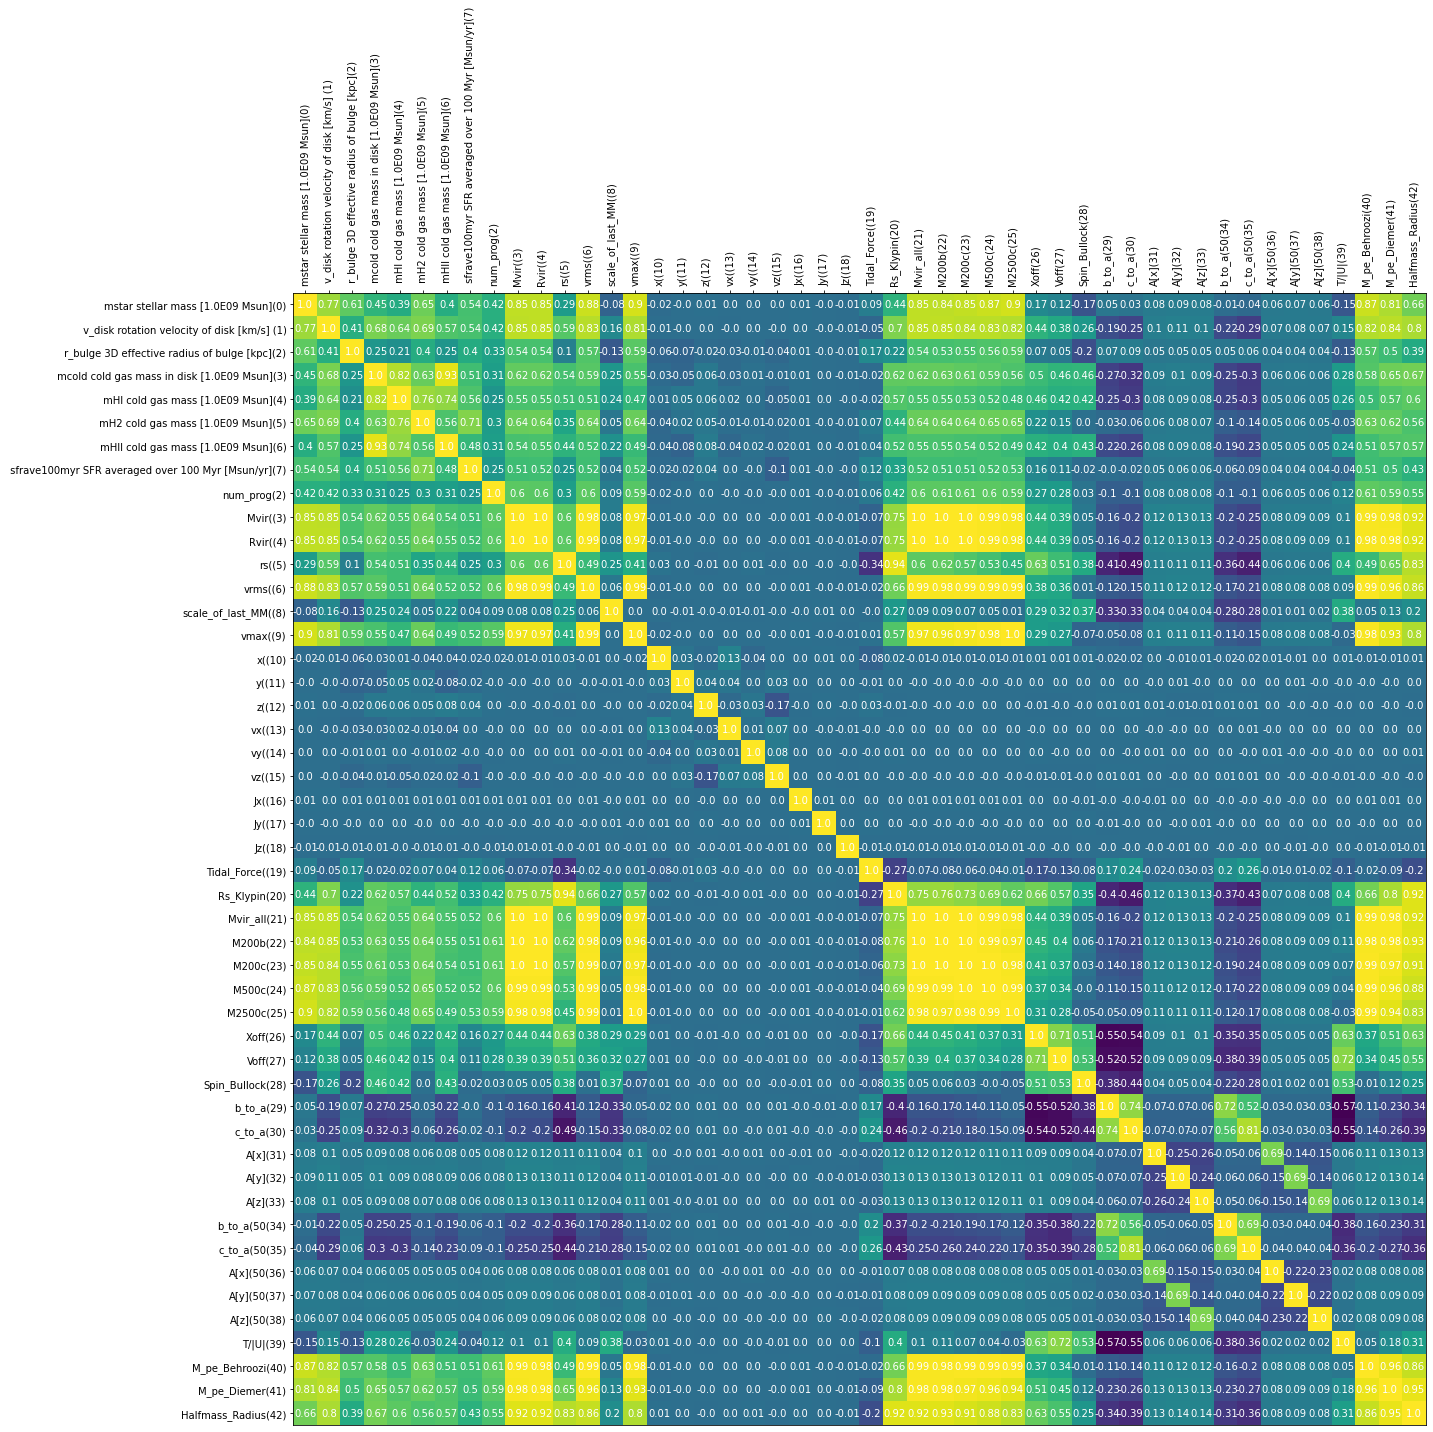

In [107]:
fig, ax = plt.subplots(figsize=(20,20))
corr=np.corrcoef(targ_feat.T)
corr =  np.maximum(corr, corr.transpose() )
show = ax.imshow(corr)

for i in range(len(cols)):
    for j in range(len(cols)):
        text = ax.text(j, i, np.round(corr[i, j], 2),
                       ha="center", va="center", color="w")
        
ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(cols, rotation = 90)
ax.set_yticks(np.arange(len(cols)))
ax.set_yticklabels(cols)
ax.tick_params(axis = 'x', bottom = False, top = True, labelbottom = False, labeltop = True)
# ax.xticks(rotation = 90)

# fig.colorbar(show)

fig.tight_layout()

In [120]:
from scipy.cluster.hierarchy import linkage, leaves_list, optimal_leaf_ordering
from scipy.spatial.distance import squareform

dist = squareform(corr-np.diag([1]*len(corr)))
dist = np.exp(- dist)

Z = linkage(dist, optimal_ordering = True, method = "average")
sort_ind = leaves_list(optimal_leaf_ordering(Z, dist))

last = ["v0_ks_mass", "prob"]
last= [ "mstar stellar mass [1.0E09 Msun](0)" ]

ind_last = sort_ind[np.array([list(cols).index(par) for par in last])]

sort_ind = np.append(sort_ind, sort_ind[ind_last])

sort_ind = np.delete(sort_ind, ind_last)

sorted_corr = np.zeros_like(corr)

for i_old, i_new in enumerate(sort_ind):
    for j_old, j_new in enumerate(sort_ind):
        sorted_corr[i_new, j_new] = corr[i_old, j_old]

ValueError: Distance matrix 'X' diagonal must be zero.

In [125]:
corr-np.diag([1]*len(corr))==0

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [102]:
def is_symmetric(A, tol=1e-8):
    return np.linalg.norm(A-A.T, scipy.Inf) < tol;

In [103]:
is_symmetric(corr)

True

In [126]:
squareform(corr, force='yes')

ValueError: Distance matrix 'X' diagonal must be zero.

In [124]:
np.diagonal(corr)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])